In [54]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [55]:
!pip install category_encoders 
!pip install eli5 
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
import pandas as pd
df = pd.read_csv('/content/df_total.csv')

In [57]:
df['location'] = df['자치구'] +' '+ df['행정동']

In [58]:
df['location']

0        종로구 사직동
1        종로구 사직동
2        종로구 사직동
3        종로구 사직동
4        종로구 사직동
          ...   
10171     강동구 길동
10172     강동구 길동
10173     강동구 길동
10174     강동구 길동
10175     강동구 길동
Name: location, Length: 10176, dtype: object

In [59]:
df.drop(['자치구','행정동'], axis=1, inplace=True) 

In [60]:
df.columns

Index(['Unnamed: 0', '성별', '연령대', '총인구수', '1인가구수', '야간상주지 변경 미추정 인구 수',
       '야간상주지 변경횟수 평균', '주간상주지 변경 미추정 인구수', '주간상주지 변경횟수 평균', '출근 소요시간 미추정 인구수',
       '평균 출근 소요시간 평균', '근무시간 미추정 인구수', '평균 근무시간 평균', '소액결재 비사용 인구수',
       '소액결재 사용횟수 평균', '소액결재 사용 금액 없는 인구수', '소액결재 사용금액 평균',
       '최근 3개월 내 요금 연체 비율', '카카오톡 비사용 인구수', 'SNS 사용횟수', '평균 통화량', '평균 문자량',
       '평균 통화대상자 수', '평균 문자대상자 수', '데이터 사용량', '평일 총 이동 횟수 미추정 인구수',
       '평일 총 이동 횟수', '휴일 이동 미추정 인구수', '휴일 총 이동 횟수 평균',
       '집 추정 위치 평일 총 체류시간 미추정 인구수', '집 추정 위치 평일 총 체류시간',
       '집 추정 위치 휴일 총 체류시간 미추정 인구수', '집 추정 위치 휴일 총 체류시간', '평일 총 이동 거리 미추정 인구수',
       '평일 총 이동 거리 합계', '휴일 총 이동 거리 미추정 인구수', '휴일 총 이동 거리 합계',
       '지하철 이용 미추정 인구수', '지하철이동일수 합계', '게임 서비스 사용 미추정 인구수', '게임 서비스 사용일수',
       '금융 서비스 사용 미추정 인구수', '금융 서비스 사용일수', '쇼핑 서비스 사용 미추정 인구수', '쇼핑 서비스 사용일수',
       '동영상/방송 서비스 사용 미추정 인구수', '동영상/방송 서비스 사용일수', '유튜브 사용 미추정 인구수',
       '유튜브 사용일수', '넷플릭스 사용일수', '배달 서비스 사용일수', '배달_브랜드 서비스 사용일수',
       '배달_식재료 서비스 사용일수', '자치구.

In [61]:
df.drop(['Unnamed: 0'],axis =1, inplace = True)

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [63]:
df['최근 3개월 내 요금 연체 비율'].sample(5)

8701    4.47
7697    4.93
3107    1.63
6099    7.42
9340    4.47
Name: 최근 3개월 내 요금 연체 비율, dtype: float64

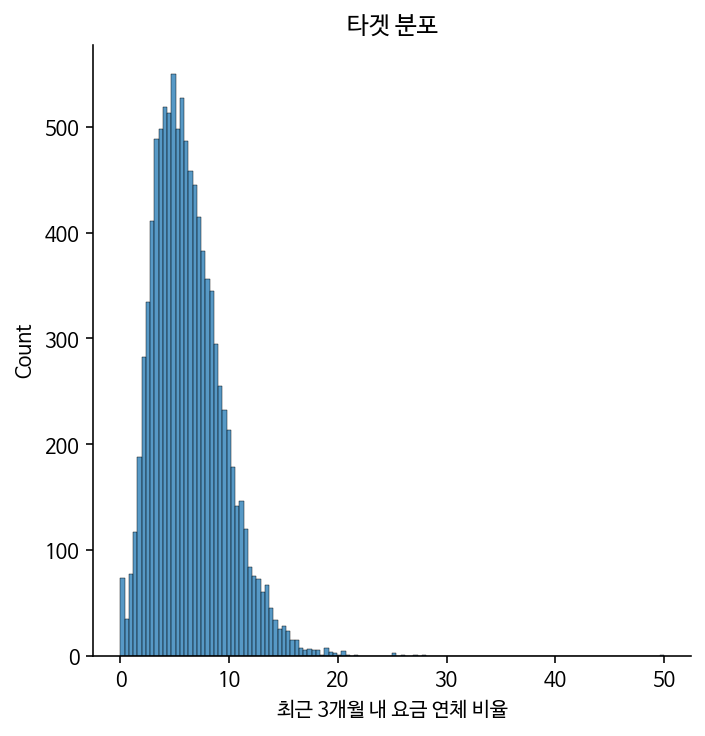

In [64]:
plt.rc('font', family='NanumBarunGothic') 
sns.displot(df['최근 3개월 내 요금 연체 비율'])
plt.title('타겟 분포')
plt.show()

In [65]:
df['최근 3개월 내 요금 연체 비율'].describe()

count    10176.000000
mean         6.287448
std          3.212442
min          0.000000
25%          3.940000
50%          5.840000
75%          8.180000
max         50.000000
Name: 최근 3개월 내 요금 연체 비율, dtype: float64

In [66]:
target_filter = df['최근 3개월 내 요금 연체 비율'] < 40

In [67]:
df_clean = df.loc[target_filter]
df_clean['최근 3개월 내 요금 연체 비율'].describe()

count    10175.000000
mean         6.283152
std          3.183233
min          0.000000
25%          3.940000
50%          5.840000
75%          8.180000
max         27.780000
Name: 최근 3개월 내 요금 연체 비율, dtype: float64

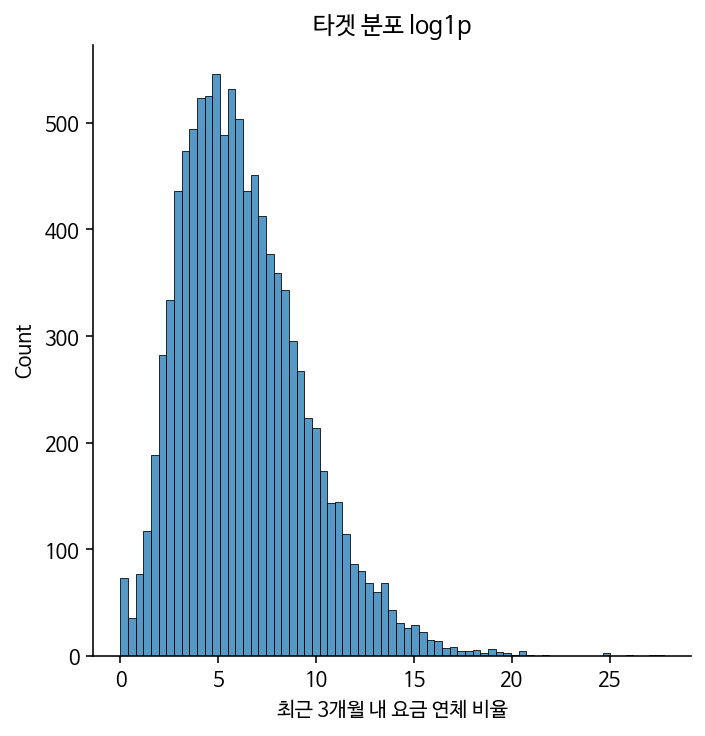

In [68]:
sns.displot(df_clean['최근 3개월 내 요금 연체 비율'])
plt.title('타겟 분포 log1p')
plt.show()

In [69]:
df_clean.sample(10)

,성별,연령대,총인구수,1인가구수,야간상주지 변경 미추정 인구 수,야간상주지 변경횟수 평균,주간상주지 변경 미추정 인구수,주간상주지 변경횟수 평균,출근 소요시간 미추정 인구수,평균 출근 소요시간 평균,...,평일 외출이 적은 집단,휴일 외출이 적은 집단,출근소요시간 및 근무시간이 많은 집단,외출이 매우 적은 집단(전체),외출이 매우 많은 집단,동영상서비스 이용이 많은 집단,생활서비스 이용이 많은 집단,재정상태에 대한 관심집단,외출-커뮤니케이션이 모두 적은 집단(전체),location
3395,1,75,653.05,195.06,0,1.38,0,1.00,646.20,0.00,...,12.76,21.47,15.23,19.16,1.75,20.45,10.74,20.88,3.47,강북구 우이동
3296,1,60,754.49,134.12,0,1.96,0,2.61,378.52,90.68,...,15.90,15.17,15.64,13.52,4.61,14.80,18.38,5.44,11.53,강북구 미아동
1303,1,55,477.52,55.31,0,1.70,0,2.26,214.74,96.88,...,2.42,5.42,2.20,2.88,5.01,2.55,6.86,5.21,2.87,성동구 금호1가동
2016,1,20,1113.04,525.94,0,2.81,0,4.37,417.39,87.17,...,43.35,64.10,41.68,27.79,30.05,46.88,26.86,49.05,22.62,동대문구 용신동
3135,2,35,775.38,255.27,0,1.75,0,2.67,271.74,100.88,...,22.02,24.43,32.05,18.43,27.36,30.21,34.11,29.67,14.66,강북구 번1동
9849,1,65,316.00,36.95,0,1.52,0,2.30,187.00,100.08,...,0.65,5.47,1.68,5.09,1.79,2.39,1.00,4.65,1.02,강동구 고덕1동
379,2,55,469.00,42.44,0,1.48,0,2.29,241.40,88.73,...,2.88,1.83,3.29,10.52,2.69,3.65,3.57,3.10,10.46,종로구 청운효자동
7875,1,35,1161.49,535.45,0,1.72,0,2.95,445.88,94.88,...,91.35,60.62,73.05,47.57,41.98,79.09,82.25,82.04,52.88,관악구 신사동
5934,1,50,908.00,129.74,0,1.52,0,2.43,431.17,100.77,...,6.02,15.19,10.78,18.05,10.74,11.29,18.31,21.63,15.40,강서구 화곡4동
1146,2,50,902.52,159.18,0,1.58,0,2.43,474.01,94.82,...,16.98,15.00,9.63,19.27,6.83,15.96,19.13,24.28,17.25,용산구 한남동


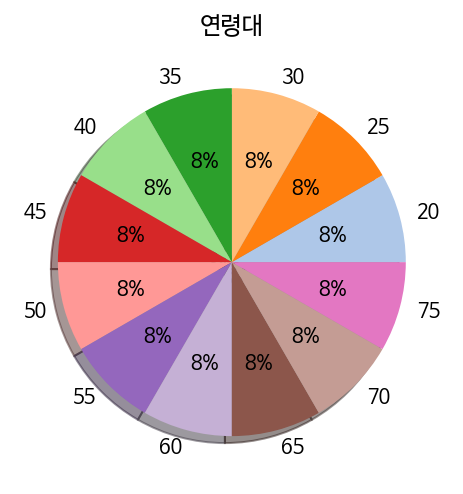

In [70]:
labels = df['연령대'].value_counts().index.tolist()
ratio = df['연령대'].value_counts().values.tolist()
cmap = plt.get_cmap("tab20")

colors = cmap(np.array([1,2,3,4,5,6,7,8,9,10,11,12]))
plt.pie(ratio, labels=labels, colors = colors, autopct='%.0f%%', shadow=True)
plt.title('연령대')
plt.show()

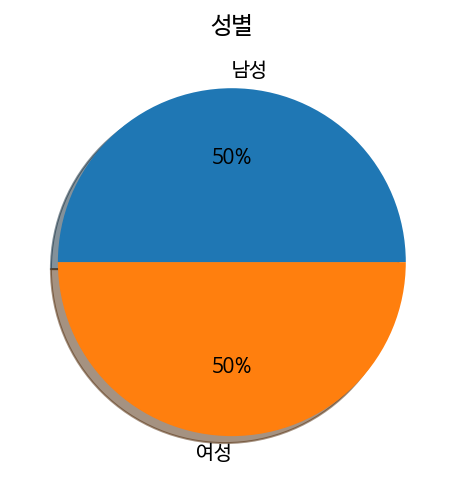

In [71]:
labels = ['남성', '여성']
ratio = df['성별'].value_counts().values.tolist()

plt.pie(ratio, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('성별')
plt.show()

In [72]:
y = df_clean['최근 3개월 내 요금 연체 비율'].groupby(df_clean['연령대']).mean()
y

연령대
20    7.900825
25    9.119894
30    8.206352
35    7.020601
40    6.671344
45    6.338502
50    6.519587
55    6.618125
60    5.796344
65    4.378455
70    3.473054
75    3.357005
Name: 최근 3개월 내 요금 연체 비율, dtype: float64

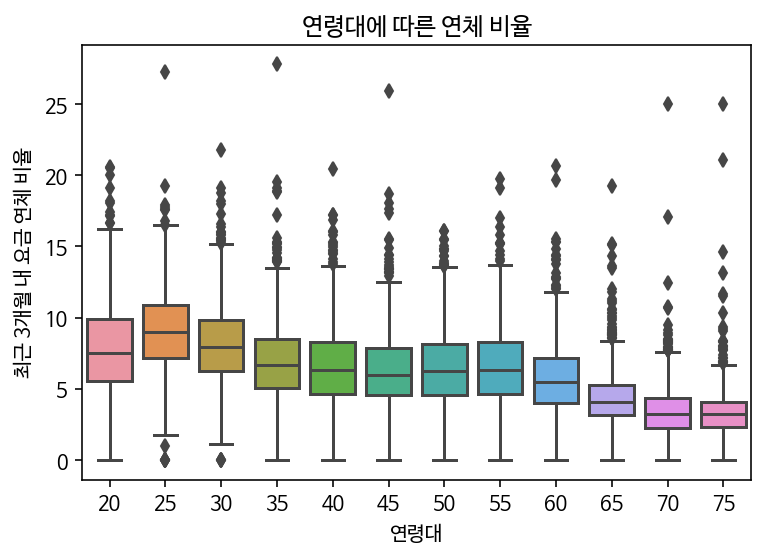

In [73]:
sns.boxplot(data=df_clean, x='연령대', y='최근 3개월 내 요금 연체 비율')
plt.title('연령대에 따른 연체 비율')
plt.show()

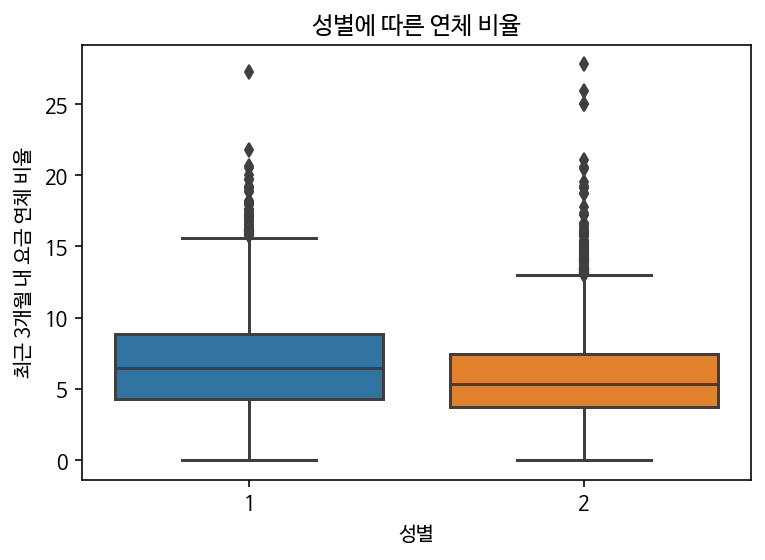

In [74]:
sns.boxplot(data=df_clean, x='성별', y='최근 3개월 내 요금 연체 비율')
plt.title('성별에 따른 연체 비율')
plt.show()

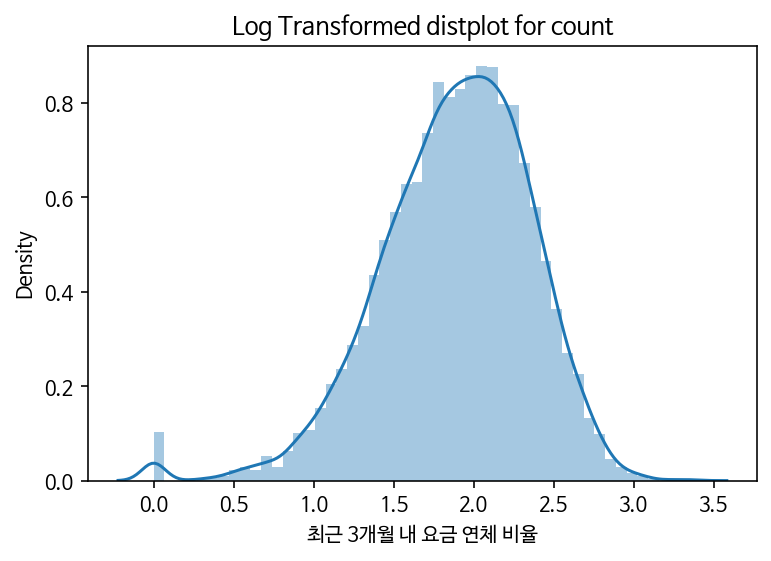

In [75]:
target = '최근 3개월 내 요금 연체 비율'
plt.title('Log Transformed distplot for count')
y_log = np.log1p(df_clean[target])
sns.distplot(y_log)
plt.show()

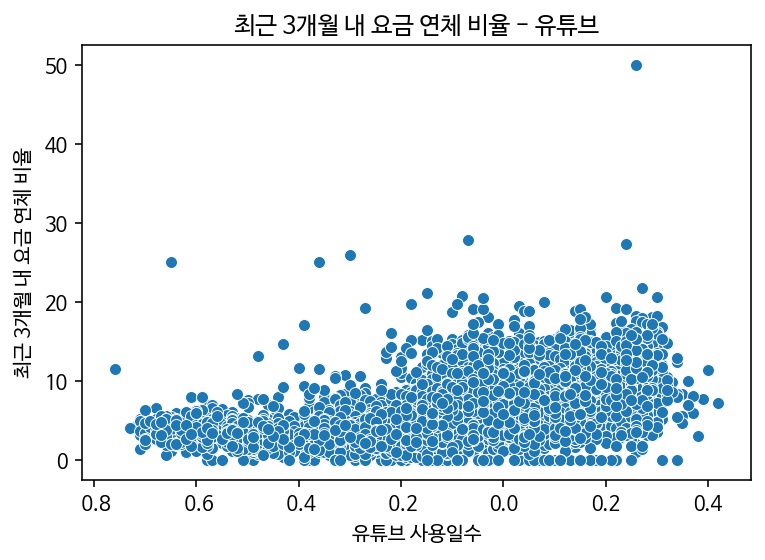

In [76]:
sns.scatterplot(data=df, x='유튜브 사용일수', y='최근 3개월 내 요금 연체 비율')
plt.title('최근 3개월 내 요금 연체 비율 - 유튜브')
plt.show()

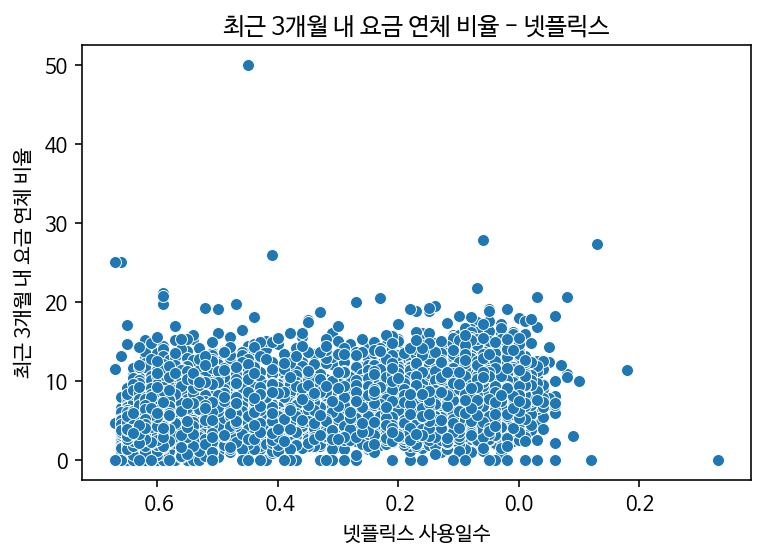

In [77]:
sns.scatterplot(data=df, x='넷플릭스 사용일수', y='최근 3개월 내 요금 연체 비율')
plt.title('최근 3개월 내 요금 연체 비율 - 넷플릭스')
plt.show()

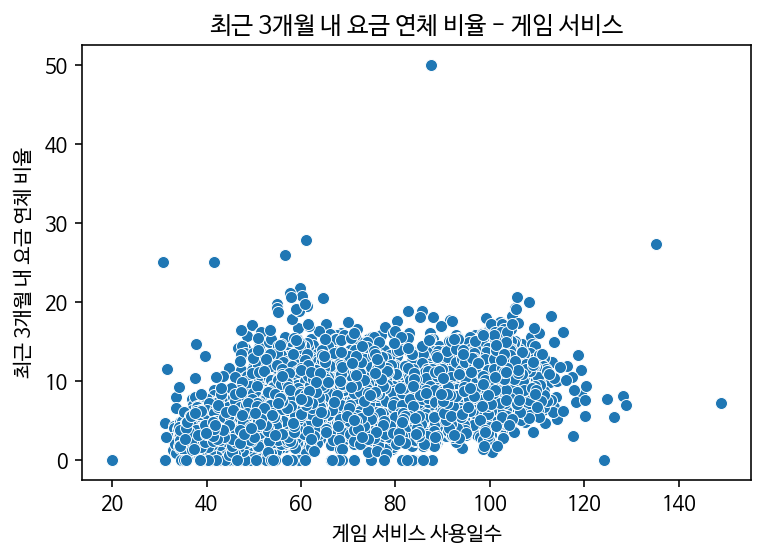

In [78]:
sns.scatterplot(data=df, x='게임 서비스 사용일수', y='최근 3개월 내 요금 연체 비율')
plt.title('최근 3개월 내 요금 연체 비율 - 게임 서비스')
plt.show()

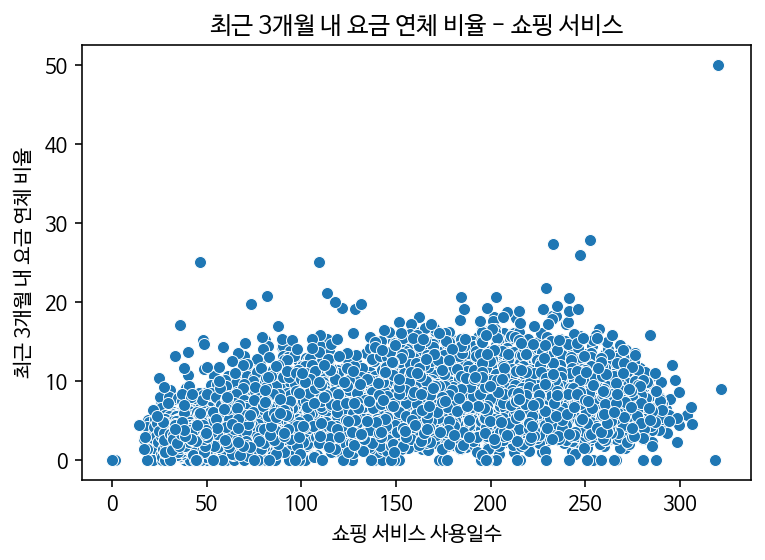

In [106]:
sns.scatterplot(data=df, x='쇼핑 서비스 사용일수', y='최근 3개월 내 요금 연체 비율')
plt.title('최근 3개월 내 요금 연체 비율 - 쇼핑 서비스')
plt.show()

In [79]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10175 entries, 0 to 10175
Data columns (total 69 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   성별                         10175 non-null  int64  
 1   연령대                        10175 non-null  int64  
 2   총인구수                       10175 non-null  float64
 3   1인가구수                      10175 non-null  float64
 4   야간상주지 변경 미추정 인구 수          10175 non-null  int64  
 5   야간상주지 변경횟수 평균              10175 non-null  float64
 6   주간상주지 변경 미추정 인구수           10175 non-null  int64  
 7   주간상주지 변경횟수 평균              10175 non-null  float64
 8   출근 소요시간 미추정 인구수            10175 non-null  float64
 9   평균 출근 소요시간 평균              10175 non-null  float64
 10  근무시간 미추정 인구수               10175 non-null  float64
 11  평균 근무시간 평균                 10175 non-null  float64
 12  소액결재 비사용 인구수               10175 non-null  float64
 13  소액결재 사용횟수 평균               10175 non-null  flo

In [80]:
df_clean = df_clean.drop(df_clean.columns[[52,53,54,55,56,57]], axis=1)

In [81]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10175 entries, 0 to 10175
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   성별                         10175 non-null  int64  
 1   연령대                        10175 non-null  int64  
 2   총인구수                       10175 non-null  float64
 3   1인가구수                      10175 non-null  float64
 4   야간상주지 변경 미추정 인구 수          10175 non-null  int64  
 5   야간상주지 변경횟수 평균              10175 non-null  float64
 6   주간상주지 변경 미추정 인구수           10175 non-null  int64  
 7   주간상주지 변경횟수 평균              10175 non-null  float64
 8   출근 소요시간 미추정 인구수            10175 non-null  float64
 9   평균 출근 소요시간 평균              10175 non-null  float64
 10  근무시간 미추정 인구수               10175 non-null  float64
 11  평균 근무시간 평균                 10175 non-null  float64
 12  소액결재 비사용 인구수               10175 non-null  float64
 13  소액결재 사용횟수 평균               10175 non-null  flo

In [82]:
X = df_clean.drop(columns=[target,'location'])
y = y_log
print(X.shape, y.shape)

(10175, 61) (10175,)


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index

scaler = RobustScaler()
X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats])

In [85]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [86]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [87]:
from sklearn.linear_model import ElasticNetCV
from IPython.display import display
from sklearn.model_selection import cross_val_score, train_test_split, KFold

In [88]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from IPython.display import display
import matplotlib.pyplot as plt

import warnings
def ignore_warn(*args, **kwargs): pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

Cs = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 50, 100]

baseline = [y_log.mean()] *len(X_test)
baseline_r2 = r2_score(y_test, baseline)
mse = mean_squared_error(y_test, baseline)
print('r2 score:', baseline_r2)
print('rmse :',np.sqrt(mse))

r2 score: -0.0007660187853497646
rmse : 0.4630155004085238


In [90]:
n_folds = 10
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

RMSE on Training set : 0.3128501566559345


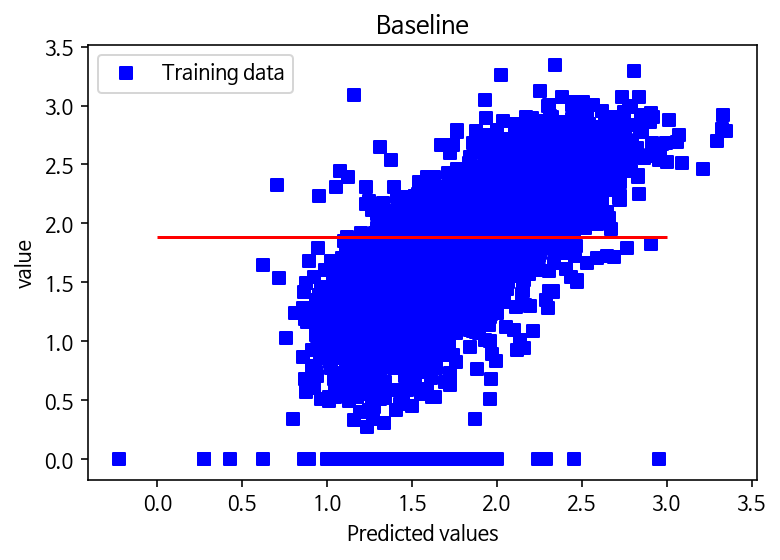

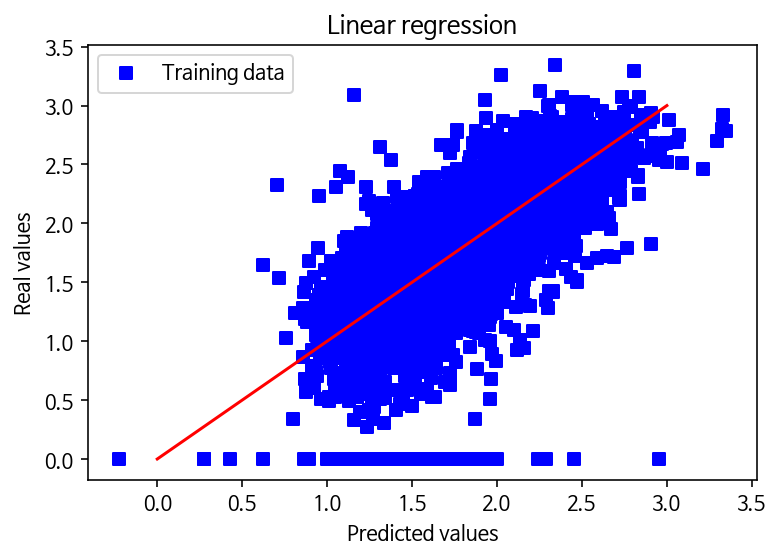

In [91]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv(lr).mean())
y_pred = lr.predict(X_train)

# Plot residuals
plt.scatter(y_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.title("Baseline")
plt.xlabel("Predicted values")
plt.ylabel("value")
plt.legend(loc = "upper left")
plt.hlines(y = y_log.mean(), xmin = 0, xmax = 3, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 3], [0, 3], c = "red")
plt.show()

Best alpha : 1.0
Try again for more precision with alphas centered around 1.0
Best alpha : 1.0
Ridge RMSE on Training set : 0.3128332354200651


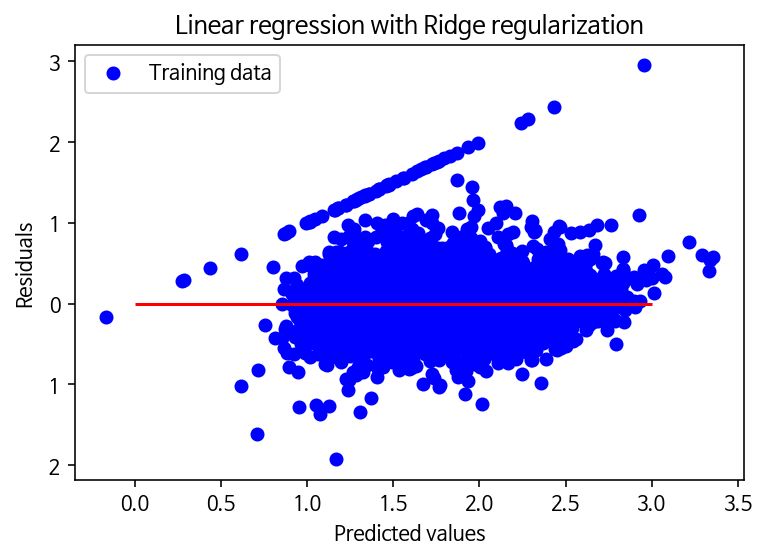

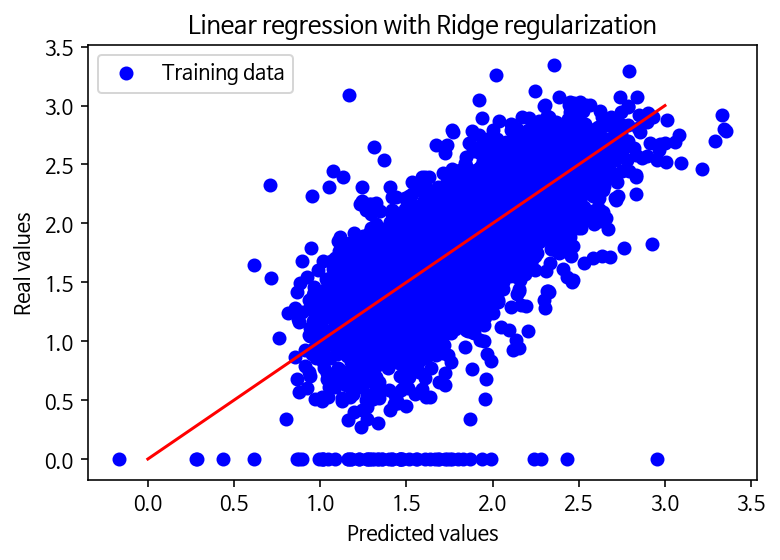

Ridge picked 59 features and eliminated the other 2 features


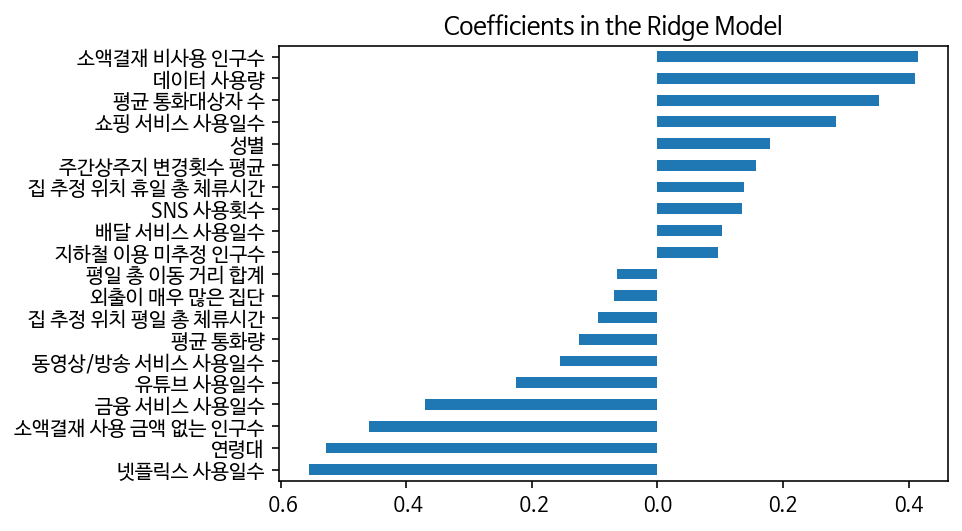

In [92]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 5, 10, 15, 25, 30, 35, 40, 45, 50, 55, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

y_rdg = ridge.predict(X_train)
print("Ridge RMSE on Training set :", rmse_cv(ridge).mean())
# Plot residuals
plt.scatter(y_rdg, y_rdg - y_train, c = "blue", label = "Training data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 3, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_rdg, y_train, c = "blue", label = "Training data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 3], [0, 3], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = df_clean.drop(columns=[target,'location']).columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [93]:
y_pred = ridge.predict(X_test)
print('Ridge')
print('rmse :',np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score :',r2_score(y_test, y_pred))

Ridge
rmse : 0.30773733529006125
r2_score : 0.5579189818254211


Best alpha : 0.0001
Try again for more precision with alphas centered around 0.0001
Best alpha : 7.500000000000001e-05
Lasso RMSE on Training set : 0.3128102507031473


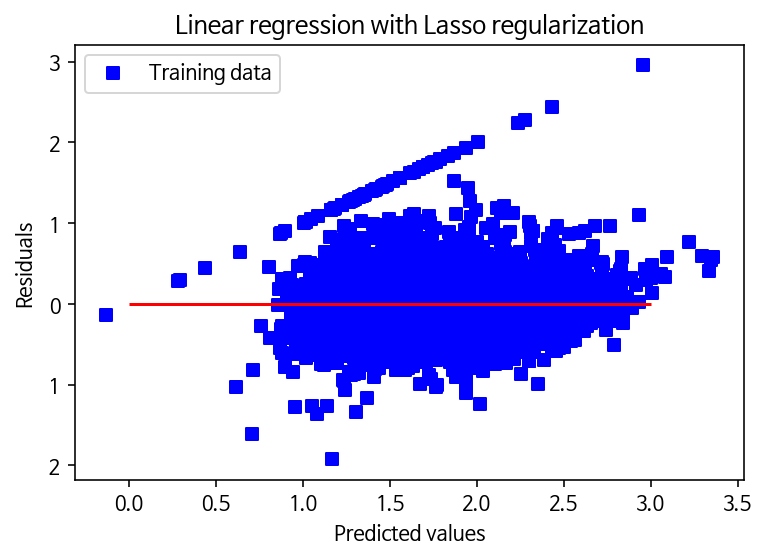

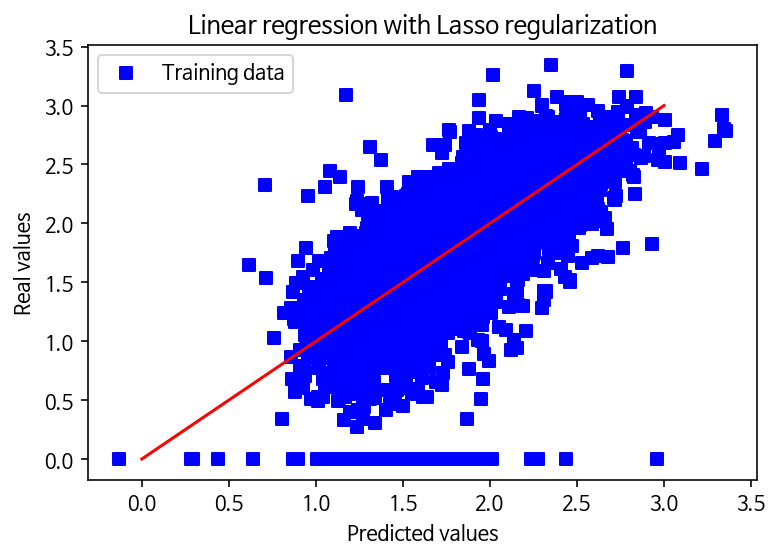

Lasso picked 58 features and eliminated the other 3 features


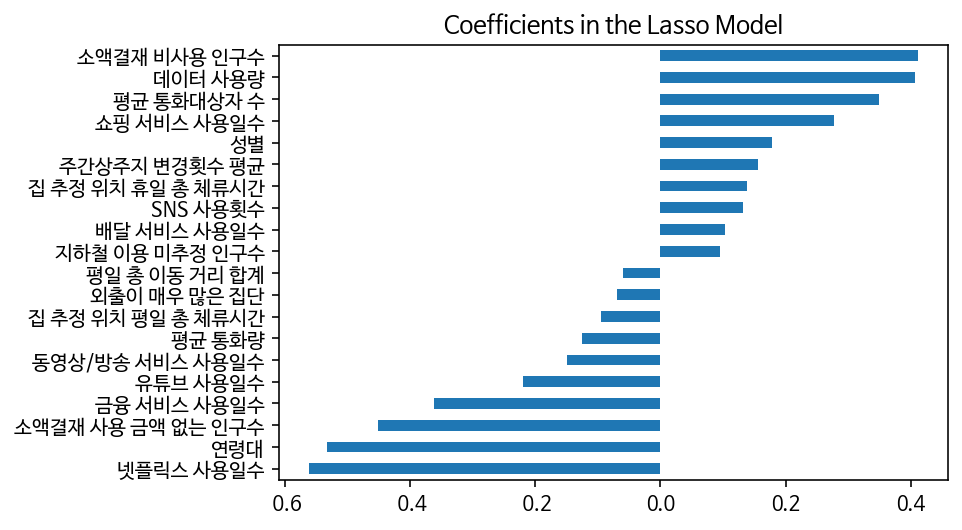

In [94]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10, n_jobs = -1)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10, n_jobs=-1)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)
y_las = lasso.predict(X_train)
print("Lasso RMSE on Training set :", rmse_cv(lasso).mean())

# Plot residuals
plt.scatter(y_las, y_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax =3, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0,3], [0,3], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [95]:
mask = lasso.coef_ != 0
df_clean.drop(columns=[target,'location']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10175 entries, 0 to 10175
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   성별                         10175 non-null  int64  
 1   연령대                        10175 non-null  int64  
 2   총인구수                       10175 non-null  float64
 3   1인가구수                      10175 non-null  float64
 4   야간상주지 변경 미추정 인구 수          10175 non-null  int64  
 5   야간상주지 변경횟수 평균              10175 non-null  float64
 6   주간상주지 변경 미추정 인구수           10175 non-null  int64  
 7   주간상주지 변경횟수 평균              10175 non-null  float64
 8   출근 소요시간 미추정 인구수            10175 non-null  float64
 9   평균 출근 소요시간 평균              10175 non-null  float64
 10  근무시간 미추정 인구수               10175 non-null  float64
 11  평균 근무시간 평균                 10175 non-null  float64
 12  소액결재 비사용 인구수               10175 non-null  float64
 13  소액결재 사용횟수 평균               10175 non-null  flo

In [96]:
y_pred = lasso.predict(X_test)
print('LASSO')
print('rmse :',np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score :',r2_score(y_test, y_pred))

LASSO
rmse : 0.30767957619490893
r2_score : 0.558084914264642


Best l1_ratio : 0.7
Best alpha : 0.0001
Try again for more precision with l1_ratio centered around 0.7
Best l1_ratio : 0.6649999999999999
Best alpha : 0.0001
Now try again for more precision on alpha, with l1_ratio fixed at 0.6649999999999999 and alpha centered around 0.0001
Best l1_ratio : 0.6649999999999999
Best alpha : 0.0001
ElasticNet RMSE on Training set : 0.31281501436372194


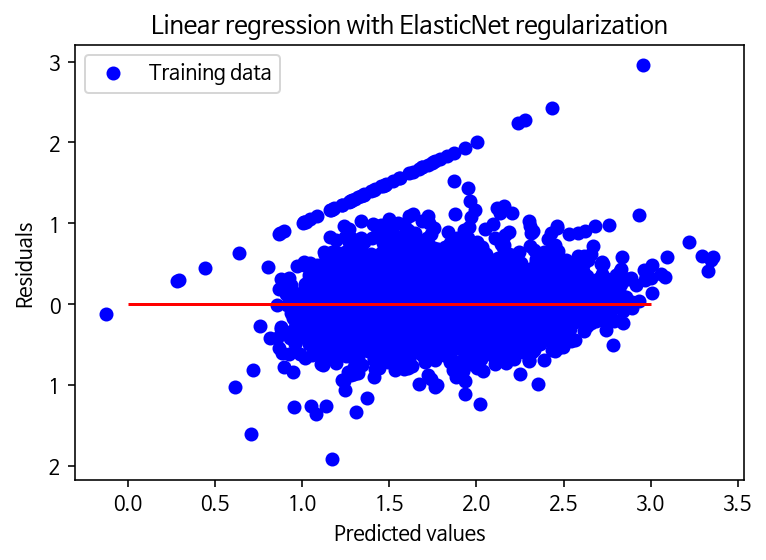

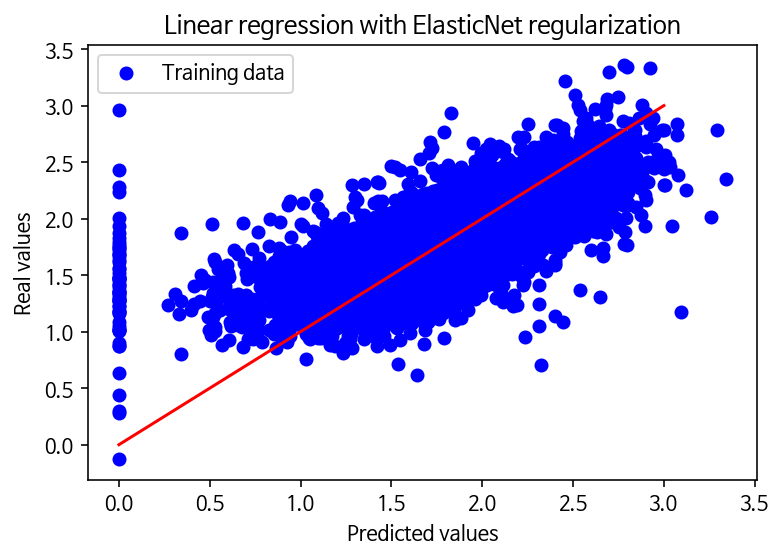

ElasticNet picked 58 features and eliminated the other 3 features


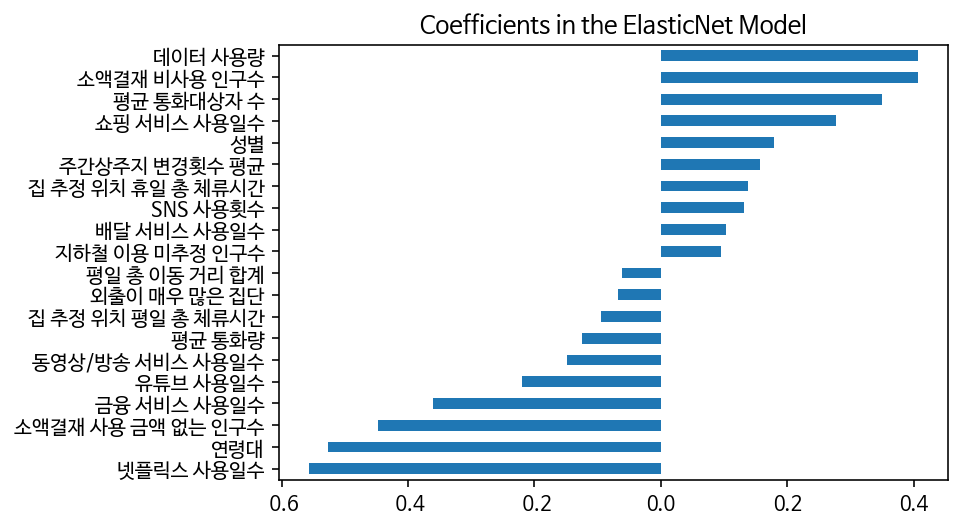

In [97]:
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10, n_jobs=-1)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1  
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )
print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10, n_jobs=-1)
elasticNet.fit(X_train, y_train)
  
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10, n_jobs=-1)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )
print("ElasticNet RMSE on Training set :", rmse_cv(elasticNet).mean())
y_ela = elasticNet.predict(X_train)

# Plot residuals
plt.scatter(y_ela, y_ela - y_train, c = "blue", label = "Training data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 3, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_ela, c = "blue", label = "Training data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 3], [0, 3], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = df_clean.drop(columns=[target,'location']).columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

In [98]:
y_pred = elasticNet.predict(X_test)
print('elasticNet')
print('rmse :',np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score :',r2_score(y_test, y_pred))

elasticNet
rmse : 0.30769270171186397
r2_score : 0.5580472095346556


In [99]:
X_test.rename(columns = {'데이터 사용량':'Using Data amount'}, inplace = True)


In [100]:
target_feature = 'Using Data amount'
plt.rcParams["figure.dpi"] = 144

(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f59dd5aa7f0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f59dd40ef70>})

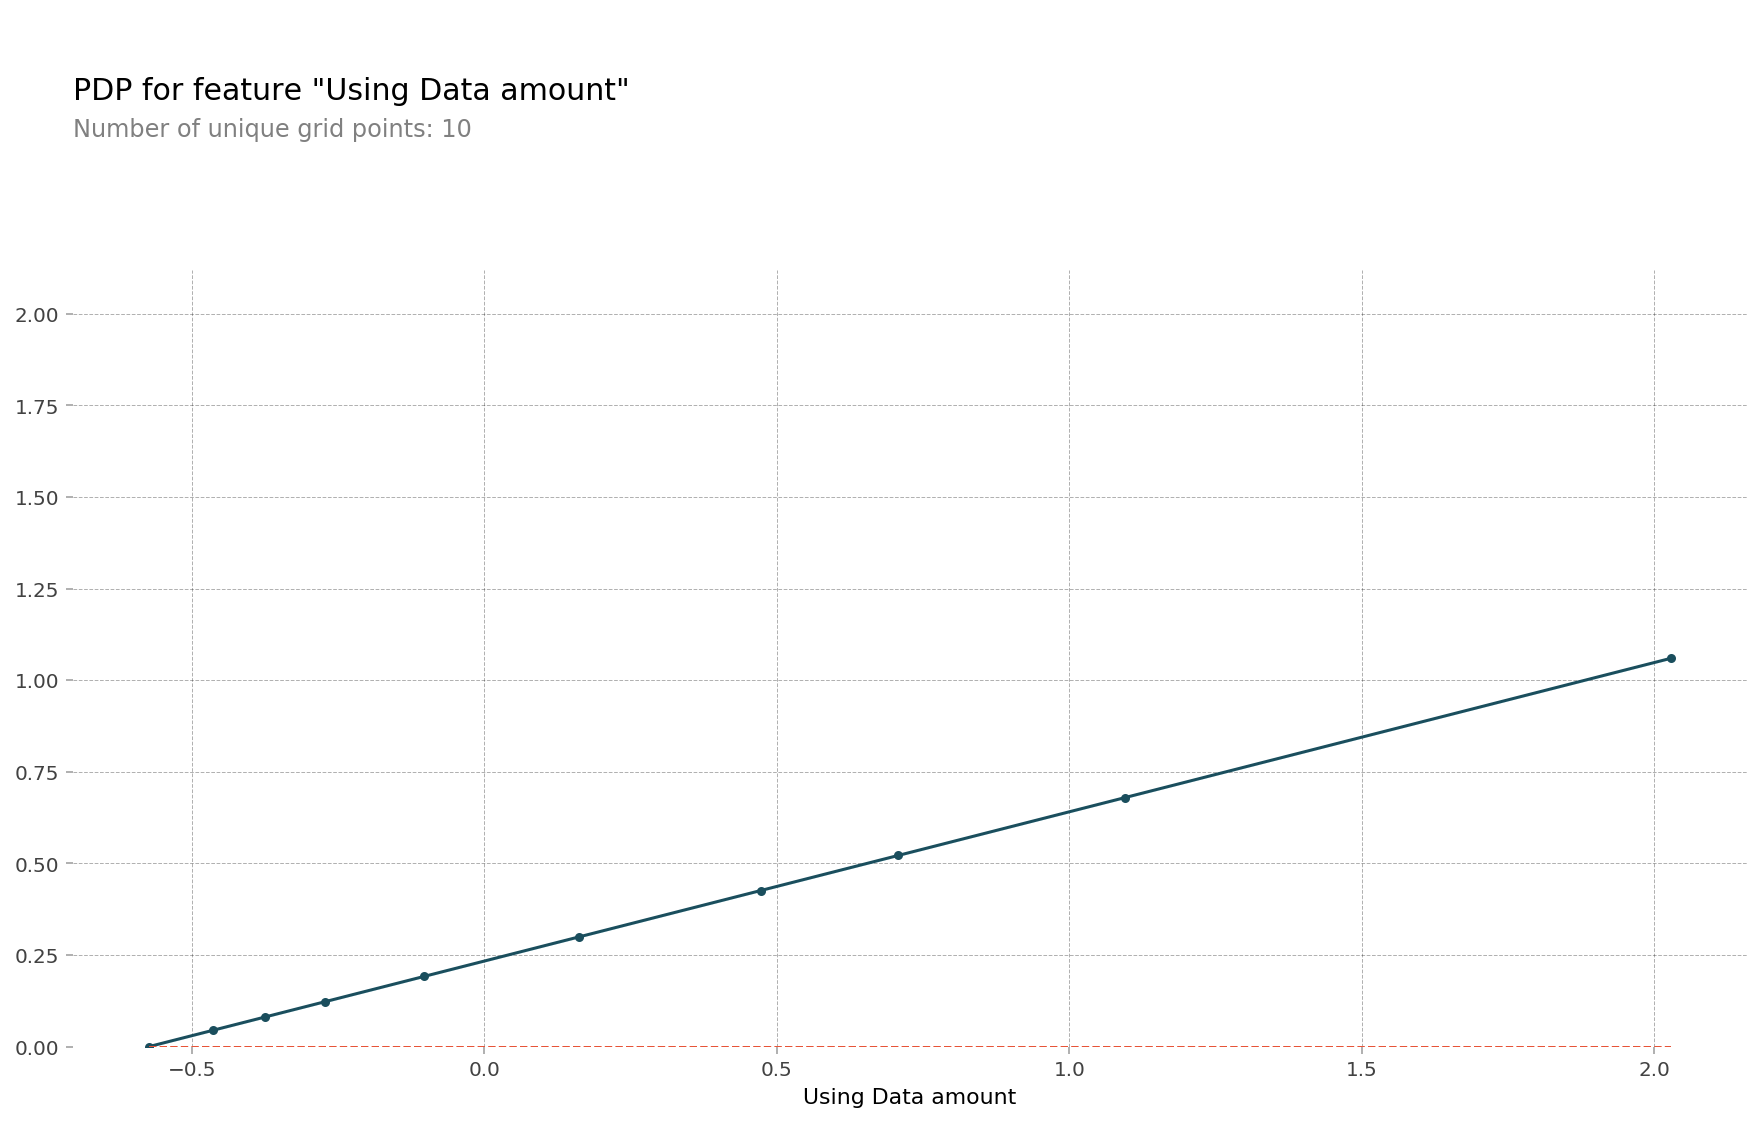

In [101]:
from pdpbox.pdp import pdp_isolate, pdp_plot
isolated = pdp_isolate(
    model=lasso,
    dataset=X_test,
    model_features= X_test.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10, 
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 2160x1368 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f59ddf41280>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f59ddf6c1c0>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f59ddf119a0>}})

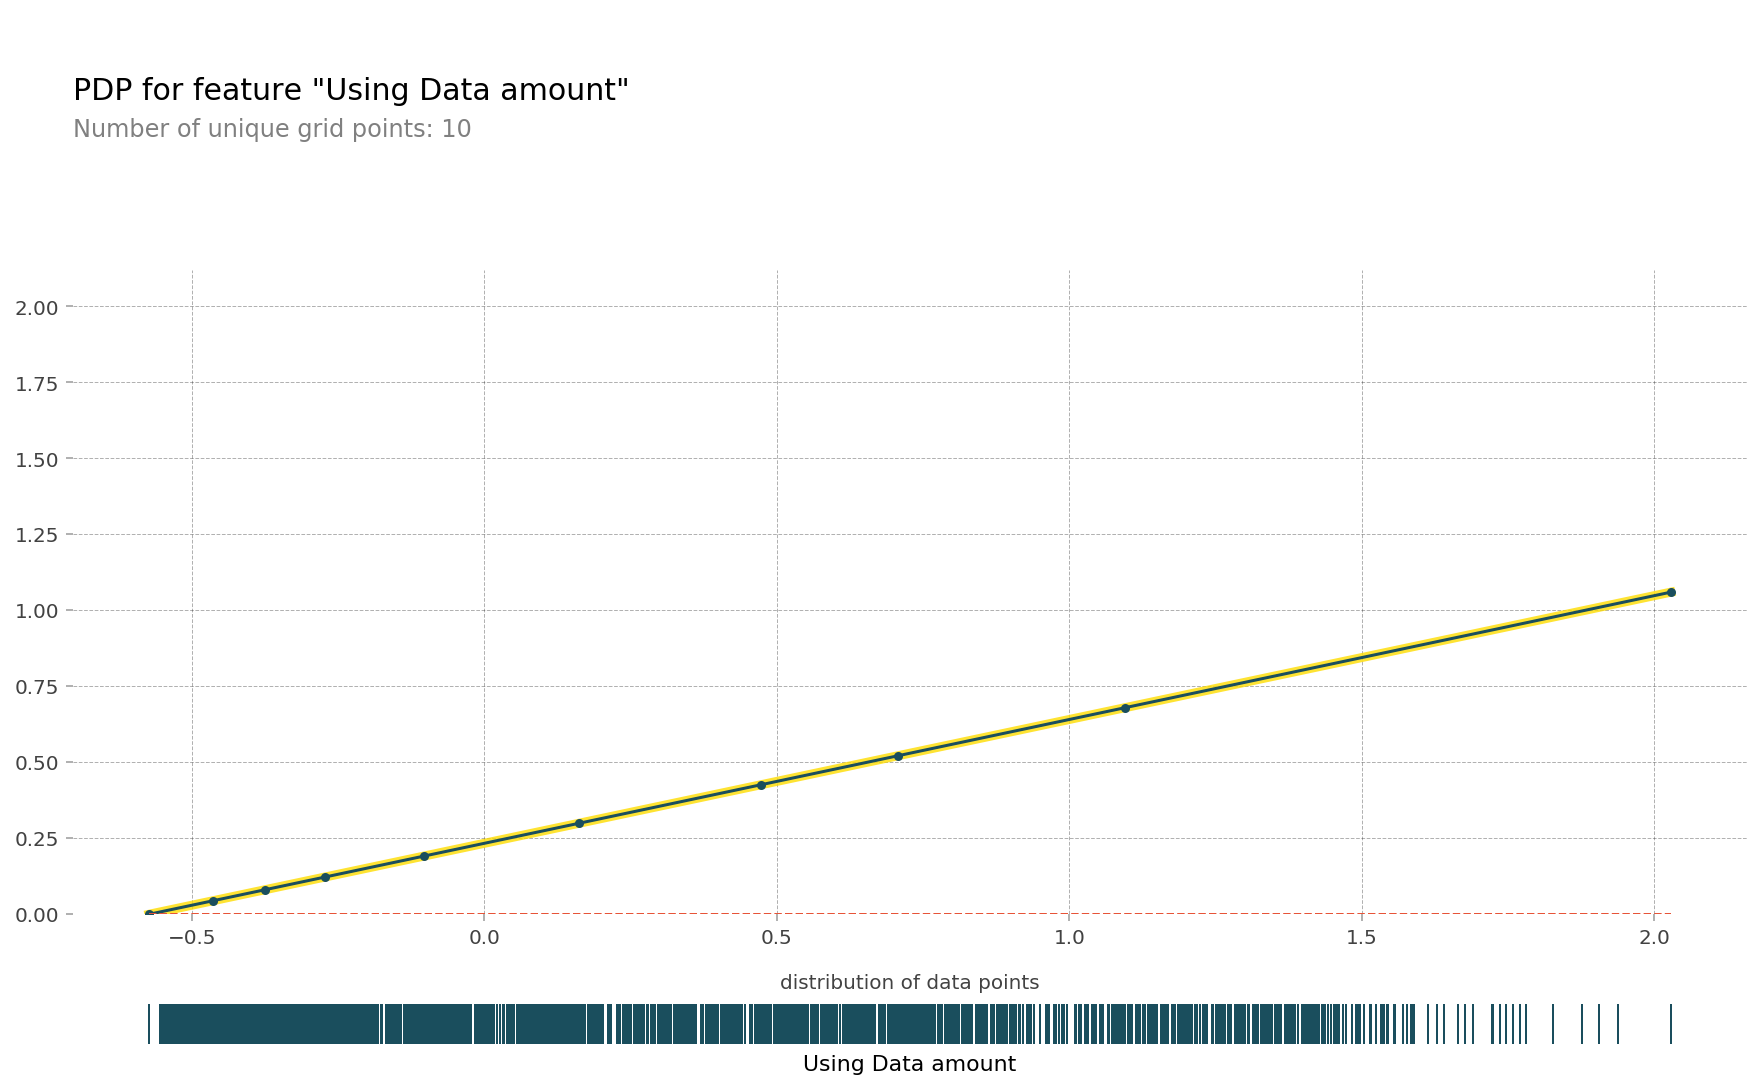

In [102]:
pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True,
)

(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f59dd6d9970>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f59dddbc7f0>})

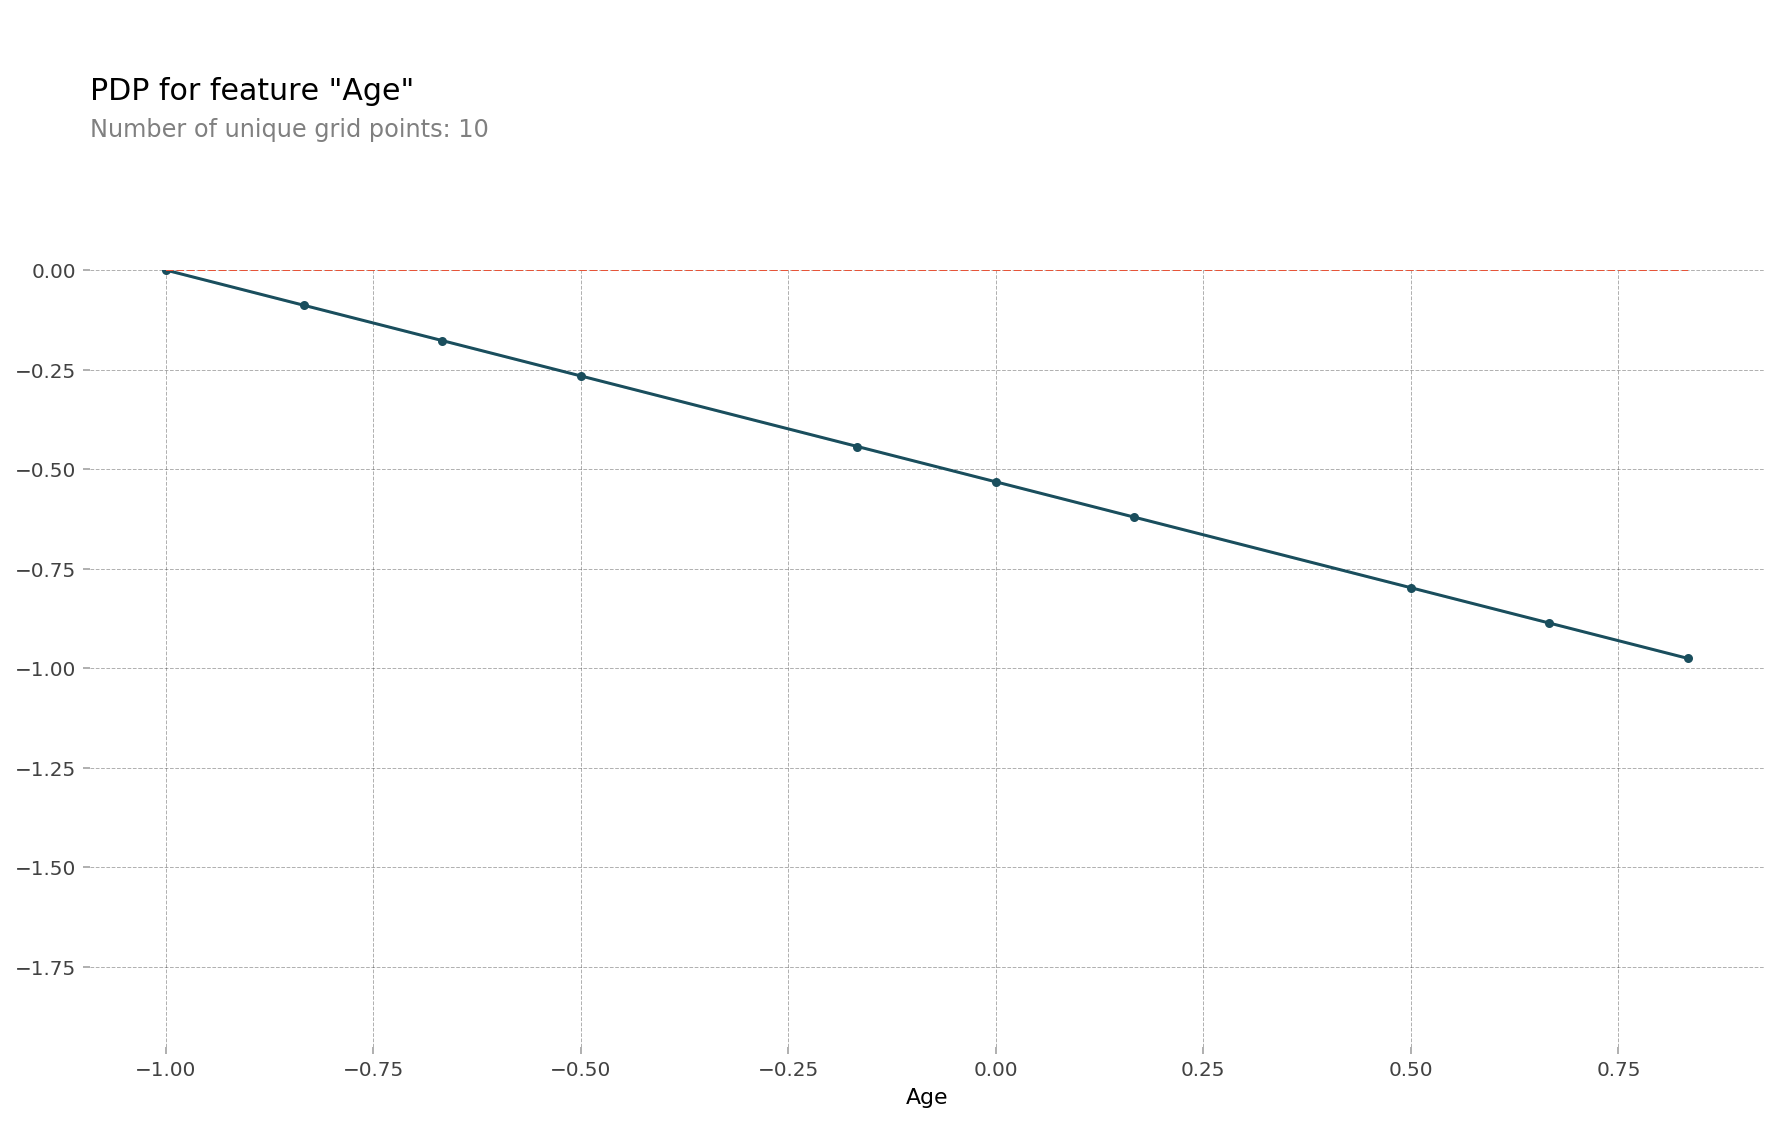

In [103]:
X_test.rename(columns = {'연령대':'Age'}, inplace = True)
target_feature = 'Age'
isolated = pdp_isolate(
    model=lasso,
    dataset=X_test,
    model_features= X_test.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10, 
)
pdp_plot(isolated, feature_name=target_feature)

In [104]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
target_features = ["Age", "성별"]

interaction = pdp_interact(
    model=lasso,
    dataset=X_test,
    model_features=X_test.columns,
    features=target_features,
)

(<Figure size 1080x1368 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f59dd597fd0>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f59dd5eb580>})

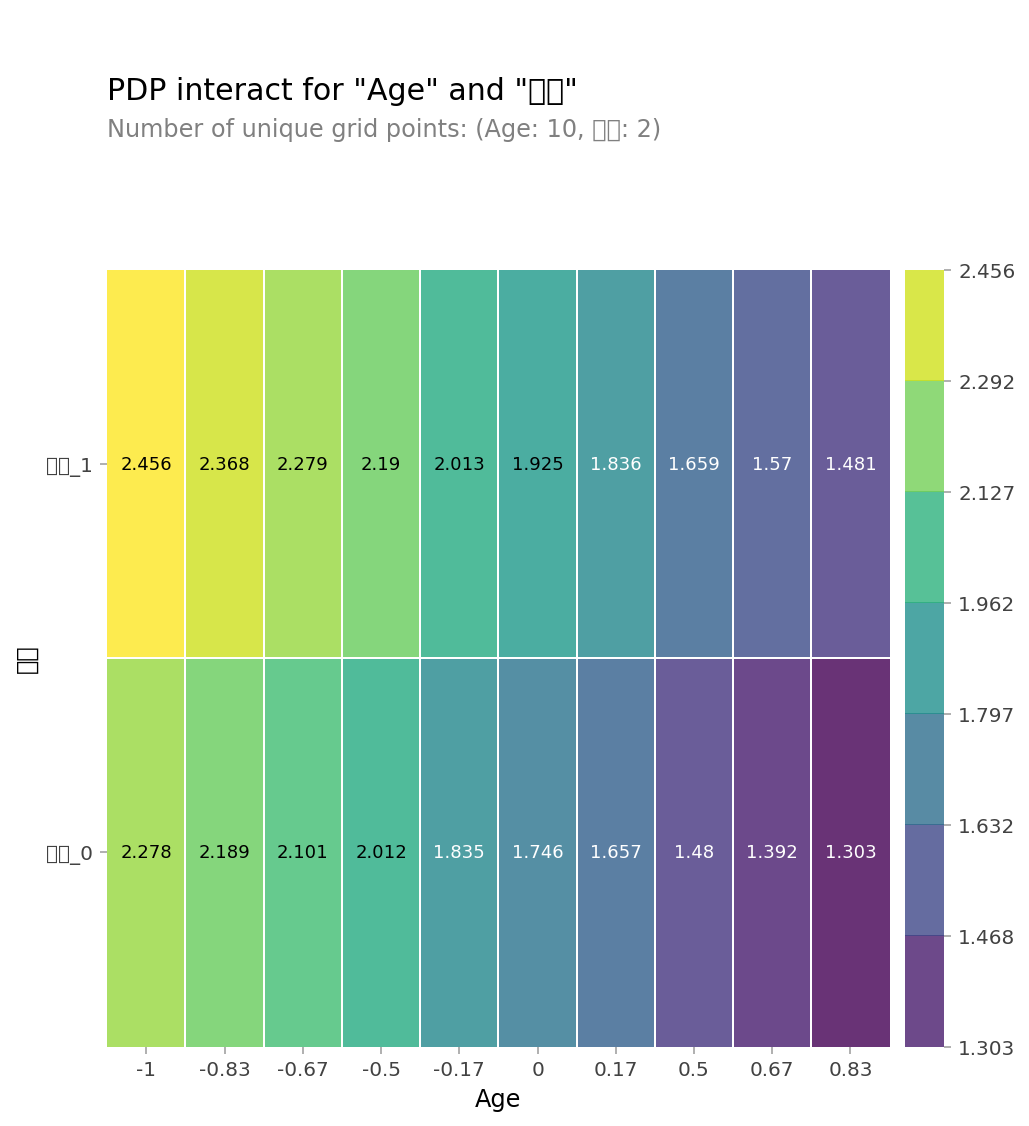

In [105]:
pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)

(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f59dd50bbb0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f59dd4bda60>})

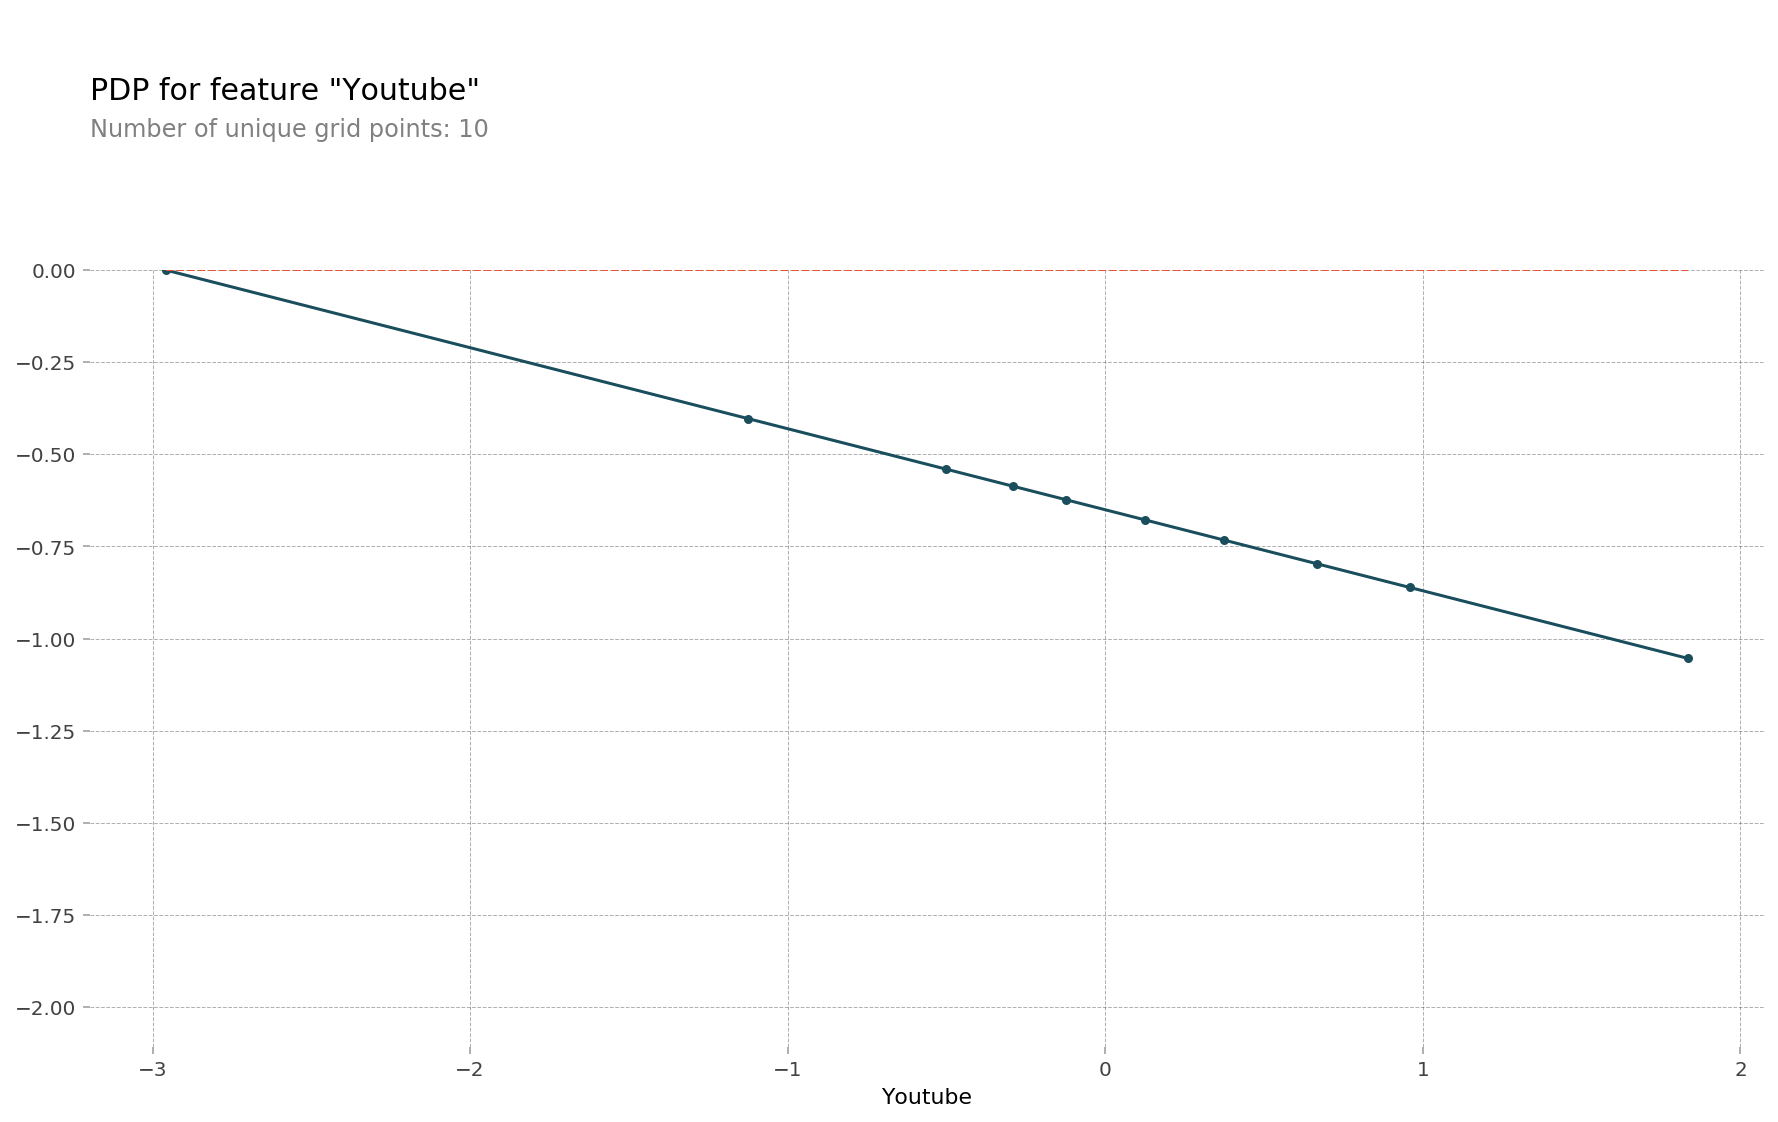

In [108]:
X_test.rename(columns = {'유튜브 사용일수':'Youtube'}, inplace = True)
target_feature = 'Youtube'
isolated = pdp_isolate(
    model=lasso,
    dataset=X_test,
    model_features= X_test.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10, 
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f59dd497df0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f59dd66b4c0>})

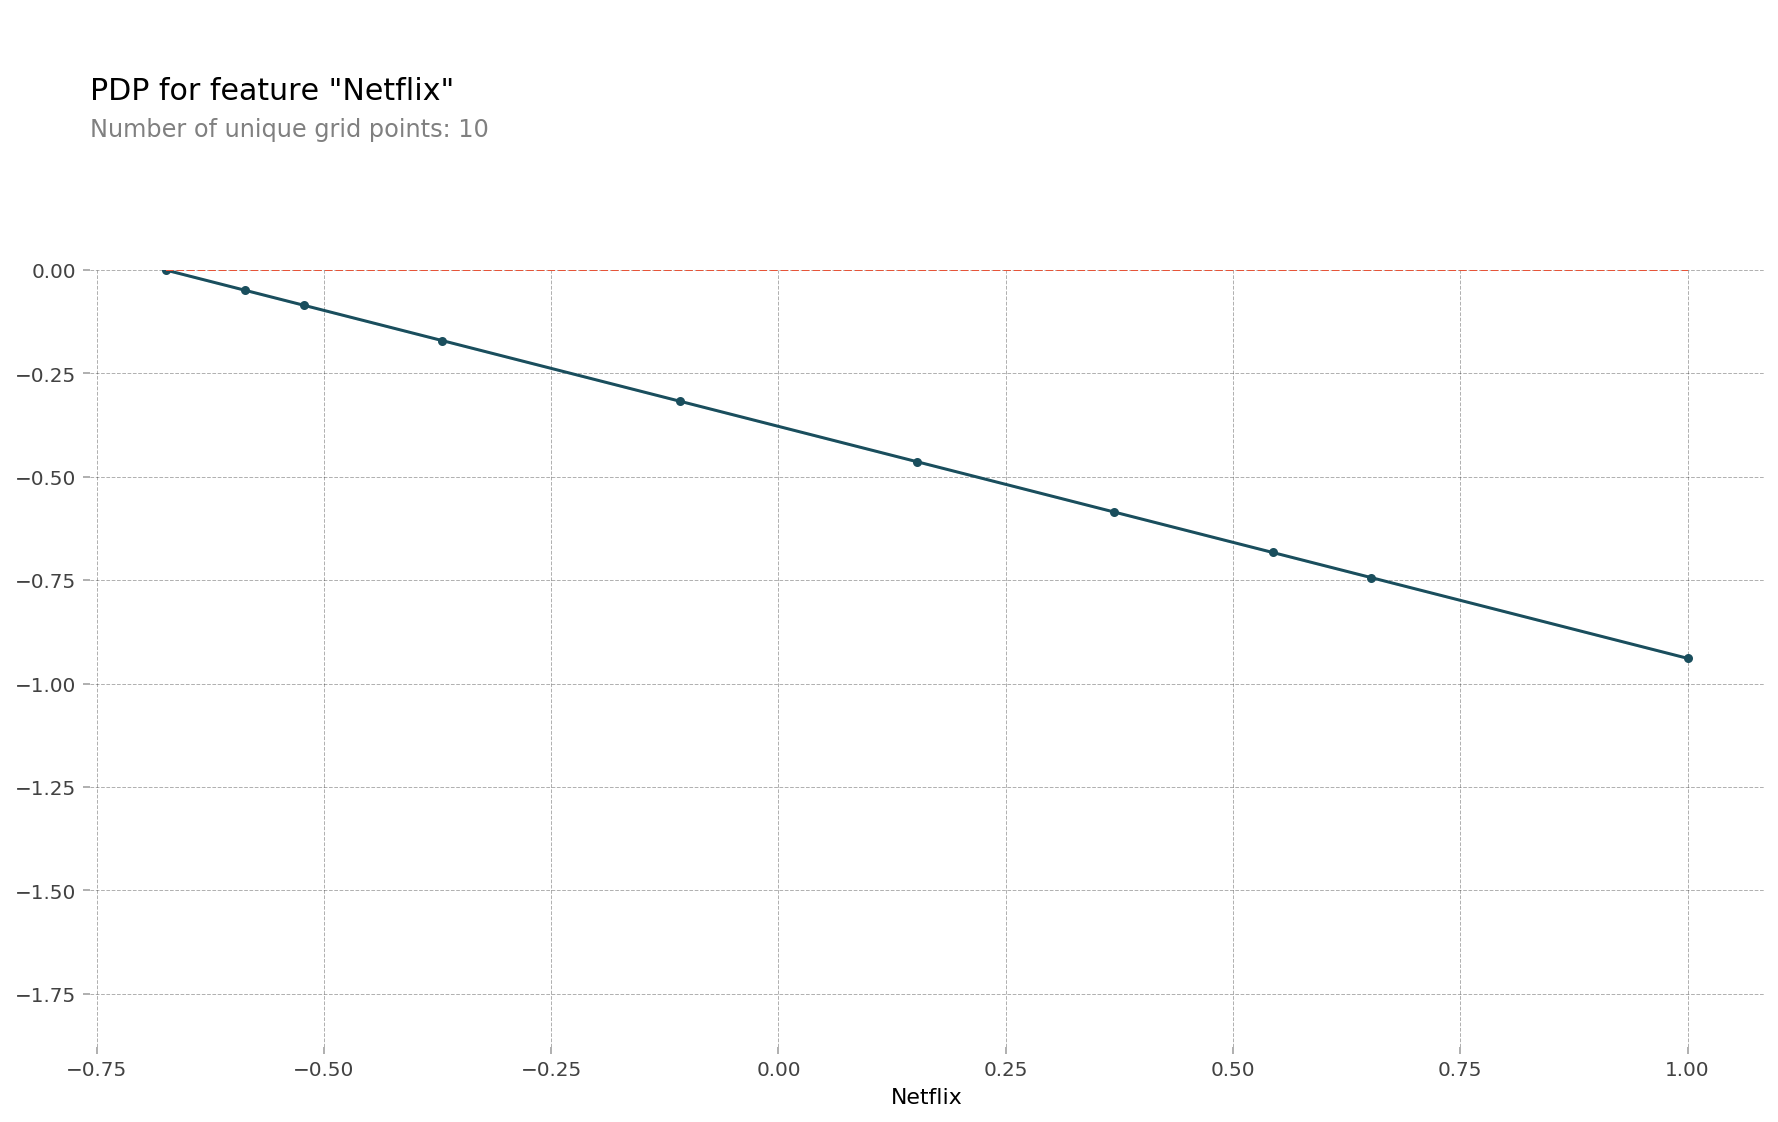

In [109]:
X_test.rename(columns = {'넷플릭스 사용일수':'Netflix'}, inplace = True)
target_feature = 'Netflix'
isolated = pdp_isolate(
    model=lasso,
    dataset=X_test,
    model_features= X_test.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10, 
)
pdp_plot(isolated, feature_name=target_feature)